In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import requests

ticker = 'vist'
ticker = ticker.upper()
today = dt.date.today()

In [2]:
def get_ema(ticker, today = today):
    ema_values = []
    for short_ema in range(2, 30):
        for long_ema in range(20, 50):
            if short_ema < long_ema:
                data = yf.download(tickers = ticker, start = '2010-1-1', end = f'{today.year}-{today.month}-{today.day}', auto_adjust = True)
                data[f'EMA_{short_ema}'] = data['Close'].ewm(span = short_ema).mean()
                data[f'EMA_{long_ema}'] = data['Close'].ewm(span = long_ema).mean()
                data['Ratio'] = (data[f'EMA_{short_ema}'] / data[f'EMA_{long_ema}']).shift()
                data['State'] = data.apply(lambda row: 'In' if row['Ratio'] >= 1 else 'Out', axis = 1)
                data['Yield'] = data['Close'].pct_change() + 1

                in_asset = data[data['State'] == 'In']
                cumulative_yield = (in_asset['Yield'].prod() - 1)
                start_date = in_asset.index[0].date()
                days = (today - start_date).days
                annual_yield = round((((1 + cumulative_yield) ** (365 / days)) - 1) * 100, 2)
                ema_values.append([short_ema, long_ema, annual_yield])

    return ema_values

ema_values = get_ema(ticker = ticker)
print(ema_values)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[[2, 20, 39.89], [2, 21, 33.56], [2, 22, 30.72], [2, 23, 29.57], [2, 24, 28.99], [2, 25, 23.13], [2, 26, 15.42], [2, 27, 14.0], [2, 28, 15.24], [2, 29, 16.89], [2, 30, 17.69], [2, 31, 15.86], [2, 32, 16.24], [2, 33, 19.2], [2, 34, 19.1], [2, 35, 15.72], [2, 36, 16.62], [2, 37, 13.46], [2, 38, 14.14], [2, 39, 13.27], [2, 40, 15.24], [2, 41, 8.8], [2, 42, 8.62], [2, 43, 5.66], [2, 44, 7.02], [2, 45, 7.74], [2, 46, 9.42], [2, 47, 10.05], [2, 48, 14.39], [2, 49, 13.29], [3, 20, 26.2], [3, 21, 27.46], [3, 22, 25.31], [3, 23, 23.72], [3, 24, 21.39], [3, 25, 22.72], [3, 26, 14.75], [3, 27, 15.27], [3, 28, 14.79], [3, 29, 14.52], [3, 30, 12.81], [3, 31, 11.36], [3, 32, 13.9], [3, 33, 7.8], [3, 34, 6.72], [3, 35, 7.03], [3, 36, 7.65], [3, 37, 4.62], [3, 38, 4.58], [3, 39, 2.26], [3, 40, 3.23], [3, 41, 2.97], [3, 42, 1.62], [3, 43, 3.57], [3, 44, 5.34], [3, 45, 4.82], [3, 46, 3.8], [3, 47, 5.4], [3, 48, 4.76], [3, 49, 9.01], [4, 20, 22.56], [4, 21, 22.09], [4, 22, 19.38], [4, 23, 15.31], [4, 24,

In [3]:
def create_ema_df(data):
    ema_columns = ['short_ema', 'long_ema', 'yield']
    ema_df = pd.DataFrame(data, columns = ema_columns)
    ema_df.sort_values(by = 'yield', ascending = False, inplace = True)
    ema_df = ema_df.iloc[:10, :]
    
    return ema_df

ema_df = create_ema_df(data = ema_values)
ema_df

,short_ema,long_ema,yield
677,25,28,51.36
699,26,27,51.36
720,26,48,51.16
654,24,29,49.78
698,25,49,49.23
630,23,30,48.94
631,23,31,48.71
649,23,49,48.67
612,22,38,48.29
629,23,29,48.25


[*********************100%%**********************]  1 of 1 completed
/var/folders/2h/zwjwlyfs0gbglx_vh0hy56g80000gn/T/ipykernel_4790/891990396.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['Action'] = ['Buy' if (data['State'][i] == 'In') and (data['State'][i - 1] == 'Out') else 'Sell' if (data['State'][i] == 'Out') and (data['State'][i - 1] == 'In') else 'Pass' for i in range(len(data))]
/Users/gianmarcocaserta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gianmarcocaserta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na optio

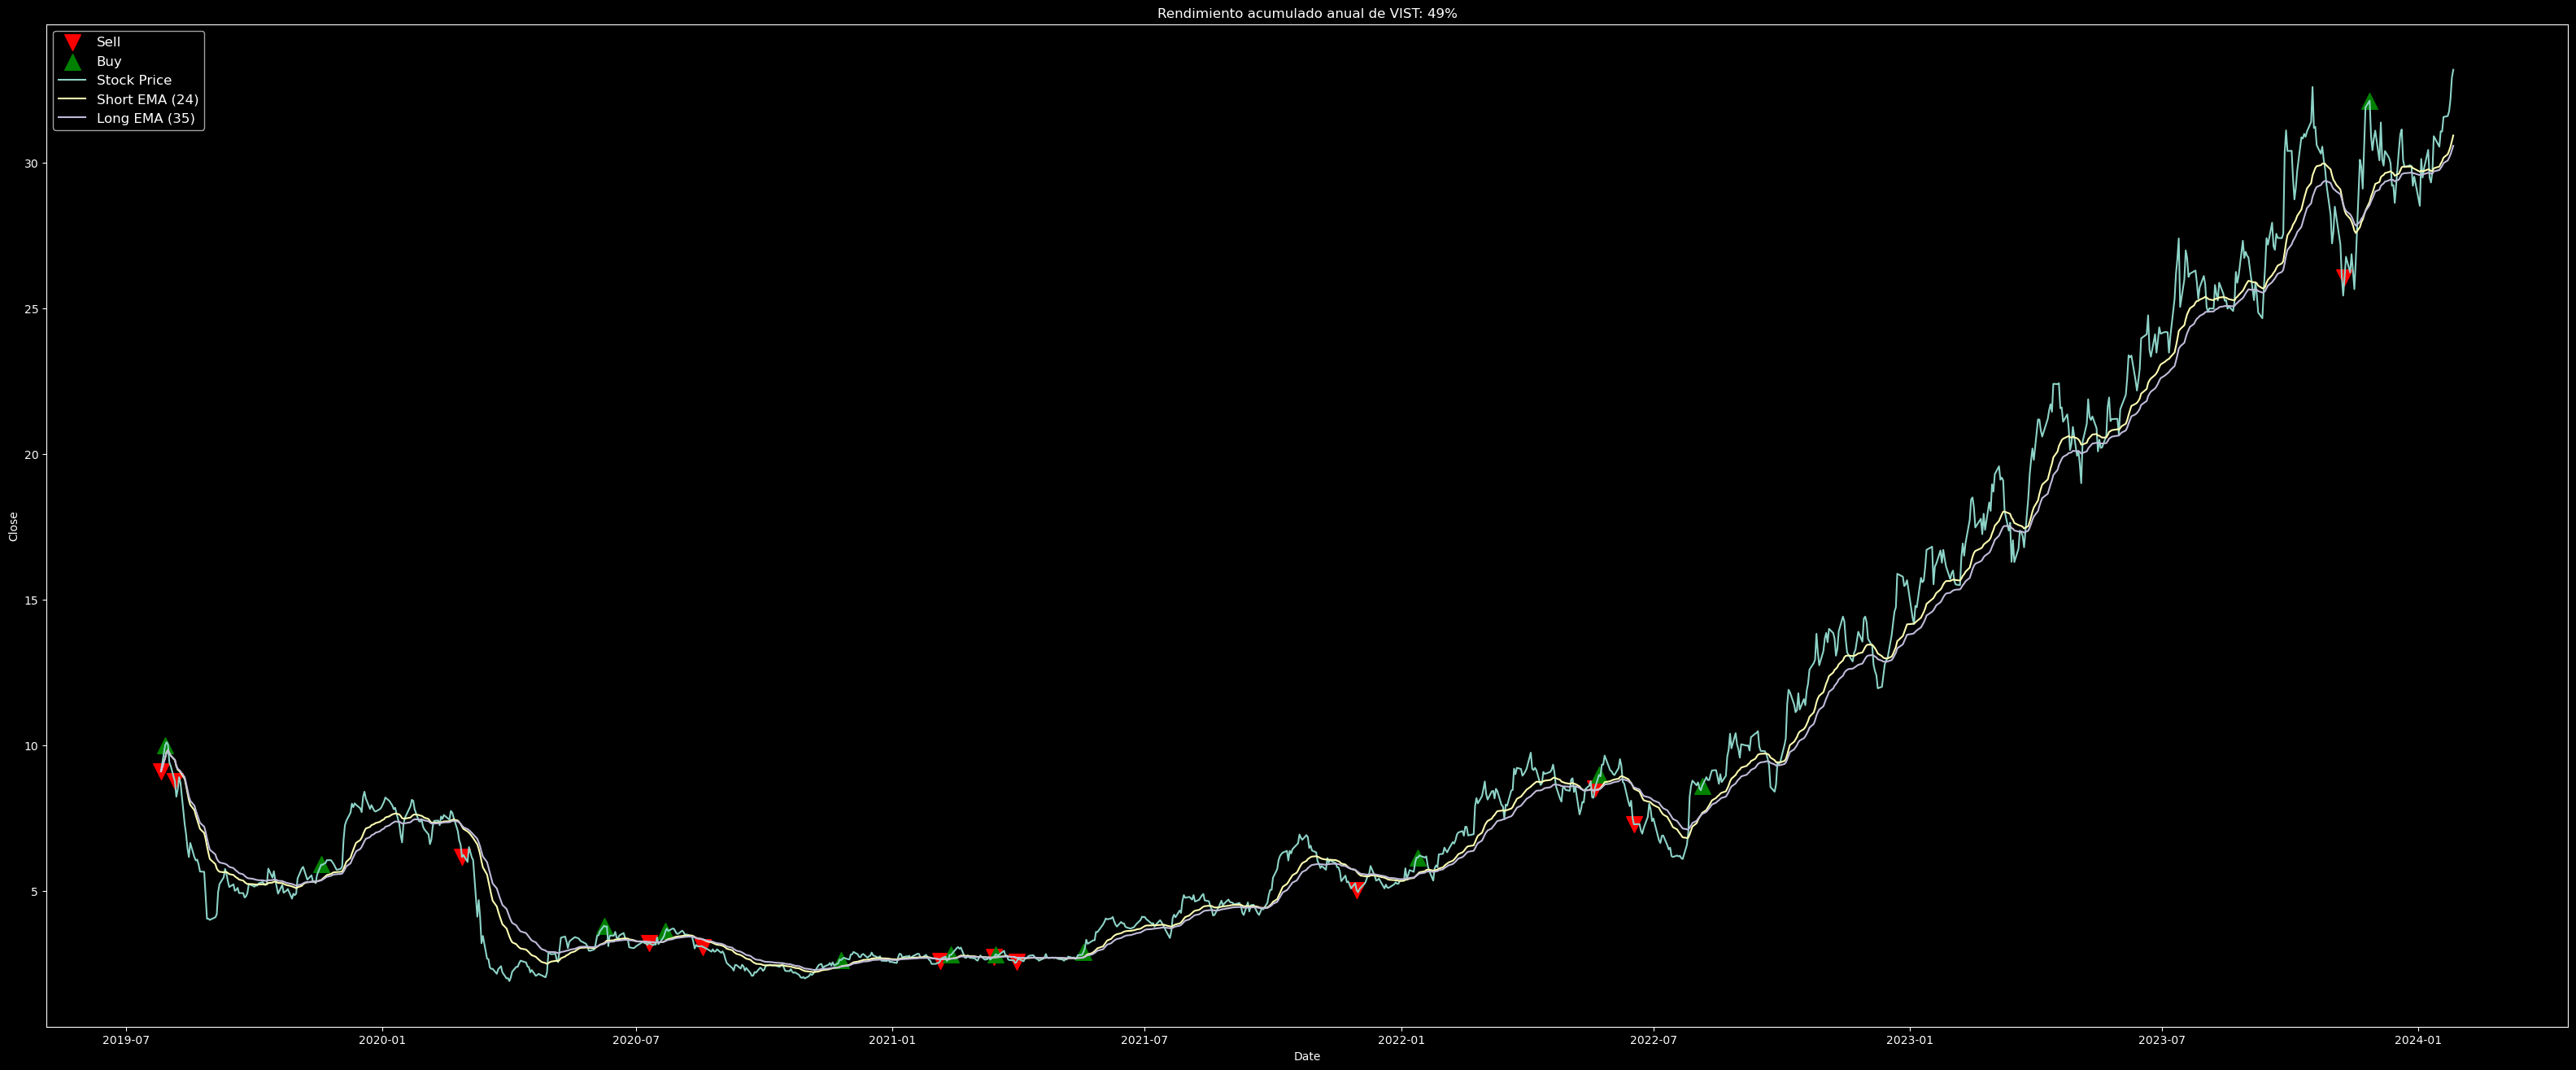

In [4]:
def mean_emas(data, ticker, today = today):
    mean_short_ema = int(data['short_ema'].mean())
    mean_long_ema = int(data['long_ema'].mean())
    mean_yield = int(data['yield'].mean())
    data = yf.download(tickers = ticker, start = '2010-1-1', end = f'{today.year}-{today.month}-{today.day}', auto_adjust = True)
    data[f'EMA_{mean_short_ema}'] = data['Close'].ewm(span = mean_short_ema).mean()
    data[f'EMA_{mean_long_ema}'] = data['Close'].ewm(span = mean_long_ema).mean()
    data['Ratio'] = (data[f'EMA_{mean_short_ema}'] / data[f'EMA_{mean_long_ema}']).shift()
    data['State'] = data.apply(lambda row: 'In' if row['Ratio'] >= 1 else 'Out', axis = 1)
    data['Action'] = ['Buy' if (data['State'][i] == 'In') and (data['State'][i - 1] == 'Out') else 'Sell' if (data['State'][i] == 'Out') and (data['State'][i - 1] == 'In') else 'Pass' for i in range(len(data))]

    sell_signals = data[data['Action'] == 'Sell']
    buy_signals = data[data['Action'] == 'Buy']
    
    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize = (40, 16))
    ax.scatter(x = sell_signals.index, y = sell_signals['Close'], color = 'red', marker = 'v', label = 'Sell', s = 200)
    ax.scatter(x = buy_signals.index, y = buy_signals['Close'], color = 'green', marker = '^', label = 'Buy', s = 200)
    sns.lineplot(data = data, x = data.index, y = data['Close'], label = 'Stock Price')
    sns.lineplot(data = data, x = data.index, y = data[f'EMA_{mean_short_ema}'], label = f'Short EMA ({mean_short_ema})')
    sns.lineplot(data = data, x = data.index, y = data[f'EMA_{mean_long_ema}'], label = f'Long EMA ({mean_long_ema})')
    plt.legend(fontsize = 'large')
    plt.title(f'Rendimiento acumulado anual de {ticker}: {mean_yield}%')
    plt.show()

    return data

mean_emas_data = mean_emas(data = ema_df, ticker = ticker)

In [5]:
def sp_companies():
    url = 'https://www.slickcharts.com/sp500'
    headers = {
        "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
        "X-Requested-With": "XMLHttpRequest"
    }

    r = requests.get(url = url, headers = headers)
    sp_data = pd.read_html(r.text)[0][['Company', 'Symbol']]

    return sp_data

sp_companies()

/var/folders/2h/zwjwlyfs0gbglx_vh0hy56g80000gn/T/ipykernel_4790/352925816.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  sp_data = pd.read_html(r.text)[0][['Company', 'Symbol']]


,Company,Symbol
0,Microsoft Corp,MSFT
1,Apple Inc.,AAPL
2,Nvidia Corp,NVDA
3,Amazon.com Inc,AMZN
4,Alphabet Inc. Class A,GOOGL
...,...,...
498,V.F. Corporation,VFC
499,Ralph Lauren Corporation,RL
500,"Mohawk Industries, Inc.",MHK
501,Fox Corporation Class B,FOX


In [6]:
def stock_correlations(ticker = ticker, sp_companies = sp_companies(), today = today):
    tickers = sp_companies['Symbol'].to_list()
    tickers = [s.replace('.', '-') for s in tickers]
    if ticker in tickers:
        tickers
    else:
        tickers.append(ticker)

    data = yf.download(tickers = tickers, start = '2010-1-1', end = f'{today.year}-{today.month}-{today.day}', auto_adjust = True)['Close']
    data = data.pct_change()
    correlation = data.corr()[ticker]
    correlation = correlation.sort_values(ascending = False)
    correlation = correlation.iloc[1:11]
    series_df = correlation.reset_index()
    series_df.columns = ['Symbol', 'Correlation']
    correlation = pd.merge(left = series_df, right = sp_companies, how = 'left', left_on= 'Symbol', right_on = 'Symbol')
    correlation.rename(columns = {'Company': 'Name'}, inplace = True)
    correlation.set_index('Symbol', inplace = True)
    
    return correlation

best_stocks = stock_correlations()
best_stocks

/var/folders/2h/zwjwlyfs0gbglx_vh0hy56g80000gn/T/ipykernel_4790/352925816.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  sp_data = pd.read_html(r.text)[0][['Company', 'Symbol']]
[*********************100%%**********************]  504 of 504 completed


,Correlation,Name
Symbol,,
HAL,0.544897,Halliburton Company
SLB,0.537702,Schlumberger Limited
MRO,0.535947,Marathon Oil Corporation
PXD,0.530499,Pioneer Natural Resource Co.
DVN,0.529797,Devon Energy Corporation
EOG,0.521111,"Eog Resources, Inc."
COP,0.514173,Conocophillips
HES,0.509573,Hess Corporation
FANG,0.509021,"Diamondback Energy, Inc."


In [7]:
def commodities():
    url = 'https://finance.yahoo.com/commodities/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAACxVMXbUY4TFerSQ8G61bHBLfBhaXr7kfzXI_kTs9WfeaaeqQ_x_RHqaiaf9mZxlSxo28LHouGXWcFWxWnhDnotI6yS50Efs0VyFDt_dHPHraJ4h9S9gkI1t31lN2tTfNPGrYPmmSjv4ekDEoqk72McrbL7QSs1mYtRaKsX7SB4A'
    headers = {
        "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
        "X-Requested-With": "XMLHttpRequest"
    }
    r = requests.get(url = url, headers = headers)
    commodities = pd.read_html(r.text)[0]
    commodities = commodities.loc[:, ['Symbol', 'Name']]

    return commodities

commodities()

/var/folders/2h/zwjwlyfs0gbglx_vh0hy56g80000gn/T/ipykernel_4790/1183730045.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  commodities = pd.read_html(r.text)[0]


,Symbol,Name
0,ES=F,S&P Futures
1,YM=F,Dow Futures
2,NQ=F,Nasdaq Futures
3,RTY=F,Russell 2000 Futures
4,ZB=F,"U.S. Treasury Bond Futures,Mar-"
5,ZN=F,"10-Year T-Note Futures,Mar-2024"
6,ZF=F,Five-Year US Treasury Note Futu
7,ZT=F,"2-Year T-Note Futures,Mar-2024"
8,GC=F,Gold
9,MGC=F,"Micro Gold Futures,Apr-2024"


In [8]:
def commodities_correlations(ticker = ticker, commodities = commodities(), today = today):
    tickers = commodities['Symbol'].to_list()
    tickers.append(ticker)
    data = yf.download(tickers = tickers, start = '2010-1-1', end = f'{today.year}-{today.month}-{today.day}', auto_adjust = True)['Close']
    data = data.pct_change()
    correlation = data.corr()
    correlation = correlation[ticker]
    correlation = correlation.sort_values(ascending = False)
    correlation = correlation.iloc[1:4]
    df_correlation = correlation.reset_index()
    df_correlation.columns = ['Symbol', 'Correlation']
    correlation = pd.merge(left = df_correlation, right = commodities, how = 'left', left_on = 'Symbol', right_on = 'Symbol')
    correlation = correlation.loc[:, ['Symbol', 'Correlation', 'Name']]
    correlation.set_index('Symbol', inplace = True)

    return correlation

best_commodities = commodities_correlations()
best_commodities

/var/folders/2h/zwjwlyfs0gbglx_vh0hy56g80000gn/T/ipykernel_4790/1183730045.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  commodities = pd.read_html(r.text)[0]
[*********************100%%**********************]  38 of 38 completed
/var/folders/2h/zwjwlyfs0gbglx_vh0hy56g80000gn/T/ipykernel_4790/3017601656.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data = data.pct_change()


,Correlation,Name
Symbol,,
RTY=F,0.434095,Russell 2000 Futures
YM=F,0.420458,Dow Futures
BZ=F,0.409422,Brent Crude Oil Last Day Financ


In [9]:
def best_correlations(stocks = best_stocks, commodities = best_commodities):
    data = pd.concat(objs = [stocks, commodities])
    data.sort_values(by = 'Correlation', ascending = False, inplace = True)

    return data

best_correlations()

,Correlation,Name
Symbol,,
HAL,0.544897,Halliburton Company
SLB,0.537702,Schlumberger Limited
MRO,0.535947,Marathon Oil Corporation
PXD,0.530499,Pioneer Natural Resource Co.
DVN,0.529797,Devon Energy Corporation
EOG,0.521111,"Eog Resources, Inc."
COP,0.514173,Conocophillips
HES,0.509573,Hess Corporation
FANG,0.509021,"Diamondback Energy, Inc."


[*********************100%%**********************]  14 of 14 completed


Ticker,APA,BZ=F,COP,DVN,EOG,FANG,HAL,HES,MRO,PXD,RTY=F,SLB,VIST,YM=F
Date,,,,,,,,,,,,,,
2019-07-26,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2019-07-29,97.492677,100.393949,99.046815,99.921686,99.561057,97.784119,96.309179,100.250694,98.181839,98.437487,99.342395,98.000500,109.890105,100.180485
2019-07-30,100.710380,101.985506,101.293611,105.246669,102.099881,100.823632,100.738173,103.626939,102.763645,101.628830,100.373065,98.850278,110.989011,100.055251
2019-07-31,102.047604,102.694609,100.561703,105.716531,101.850748,101.411923,99.869745,108.373717,102.327272,101.739390,99.696488,99.900008,110.109891,98.917087
2019-08-01,100.793951,102.726132,100.085099,98.512139,96.179834,95.499566,94.051251,106.401454,98.400017,94.015322,98.109388,96.250933,103.296695,97.767874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-22,139.263969,126.158208,216.996926,210.142222,163.678580,178.261175,161.598616,246.712673,172.311703,202.648810,126.228267,142.064022,347.142844,140.701315
2024-01-23,139.898848,125.354561,216.856359,210.754579,163.279153,177.709754,165.681991,245.960613,173.007757,205.129377,125.798293,141.335195,348.901084,140.296144
2024-01-24,142.256951,126.126697,220.229993,212.387542,165.823676,179.739443,172.863121,251.171346,174.709214,208.705154,124.704391,144.839142,353.516449,139.890972


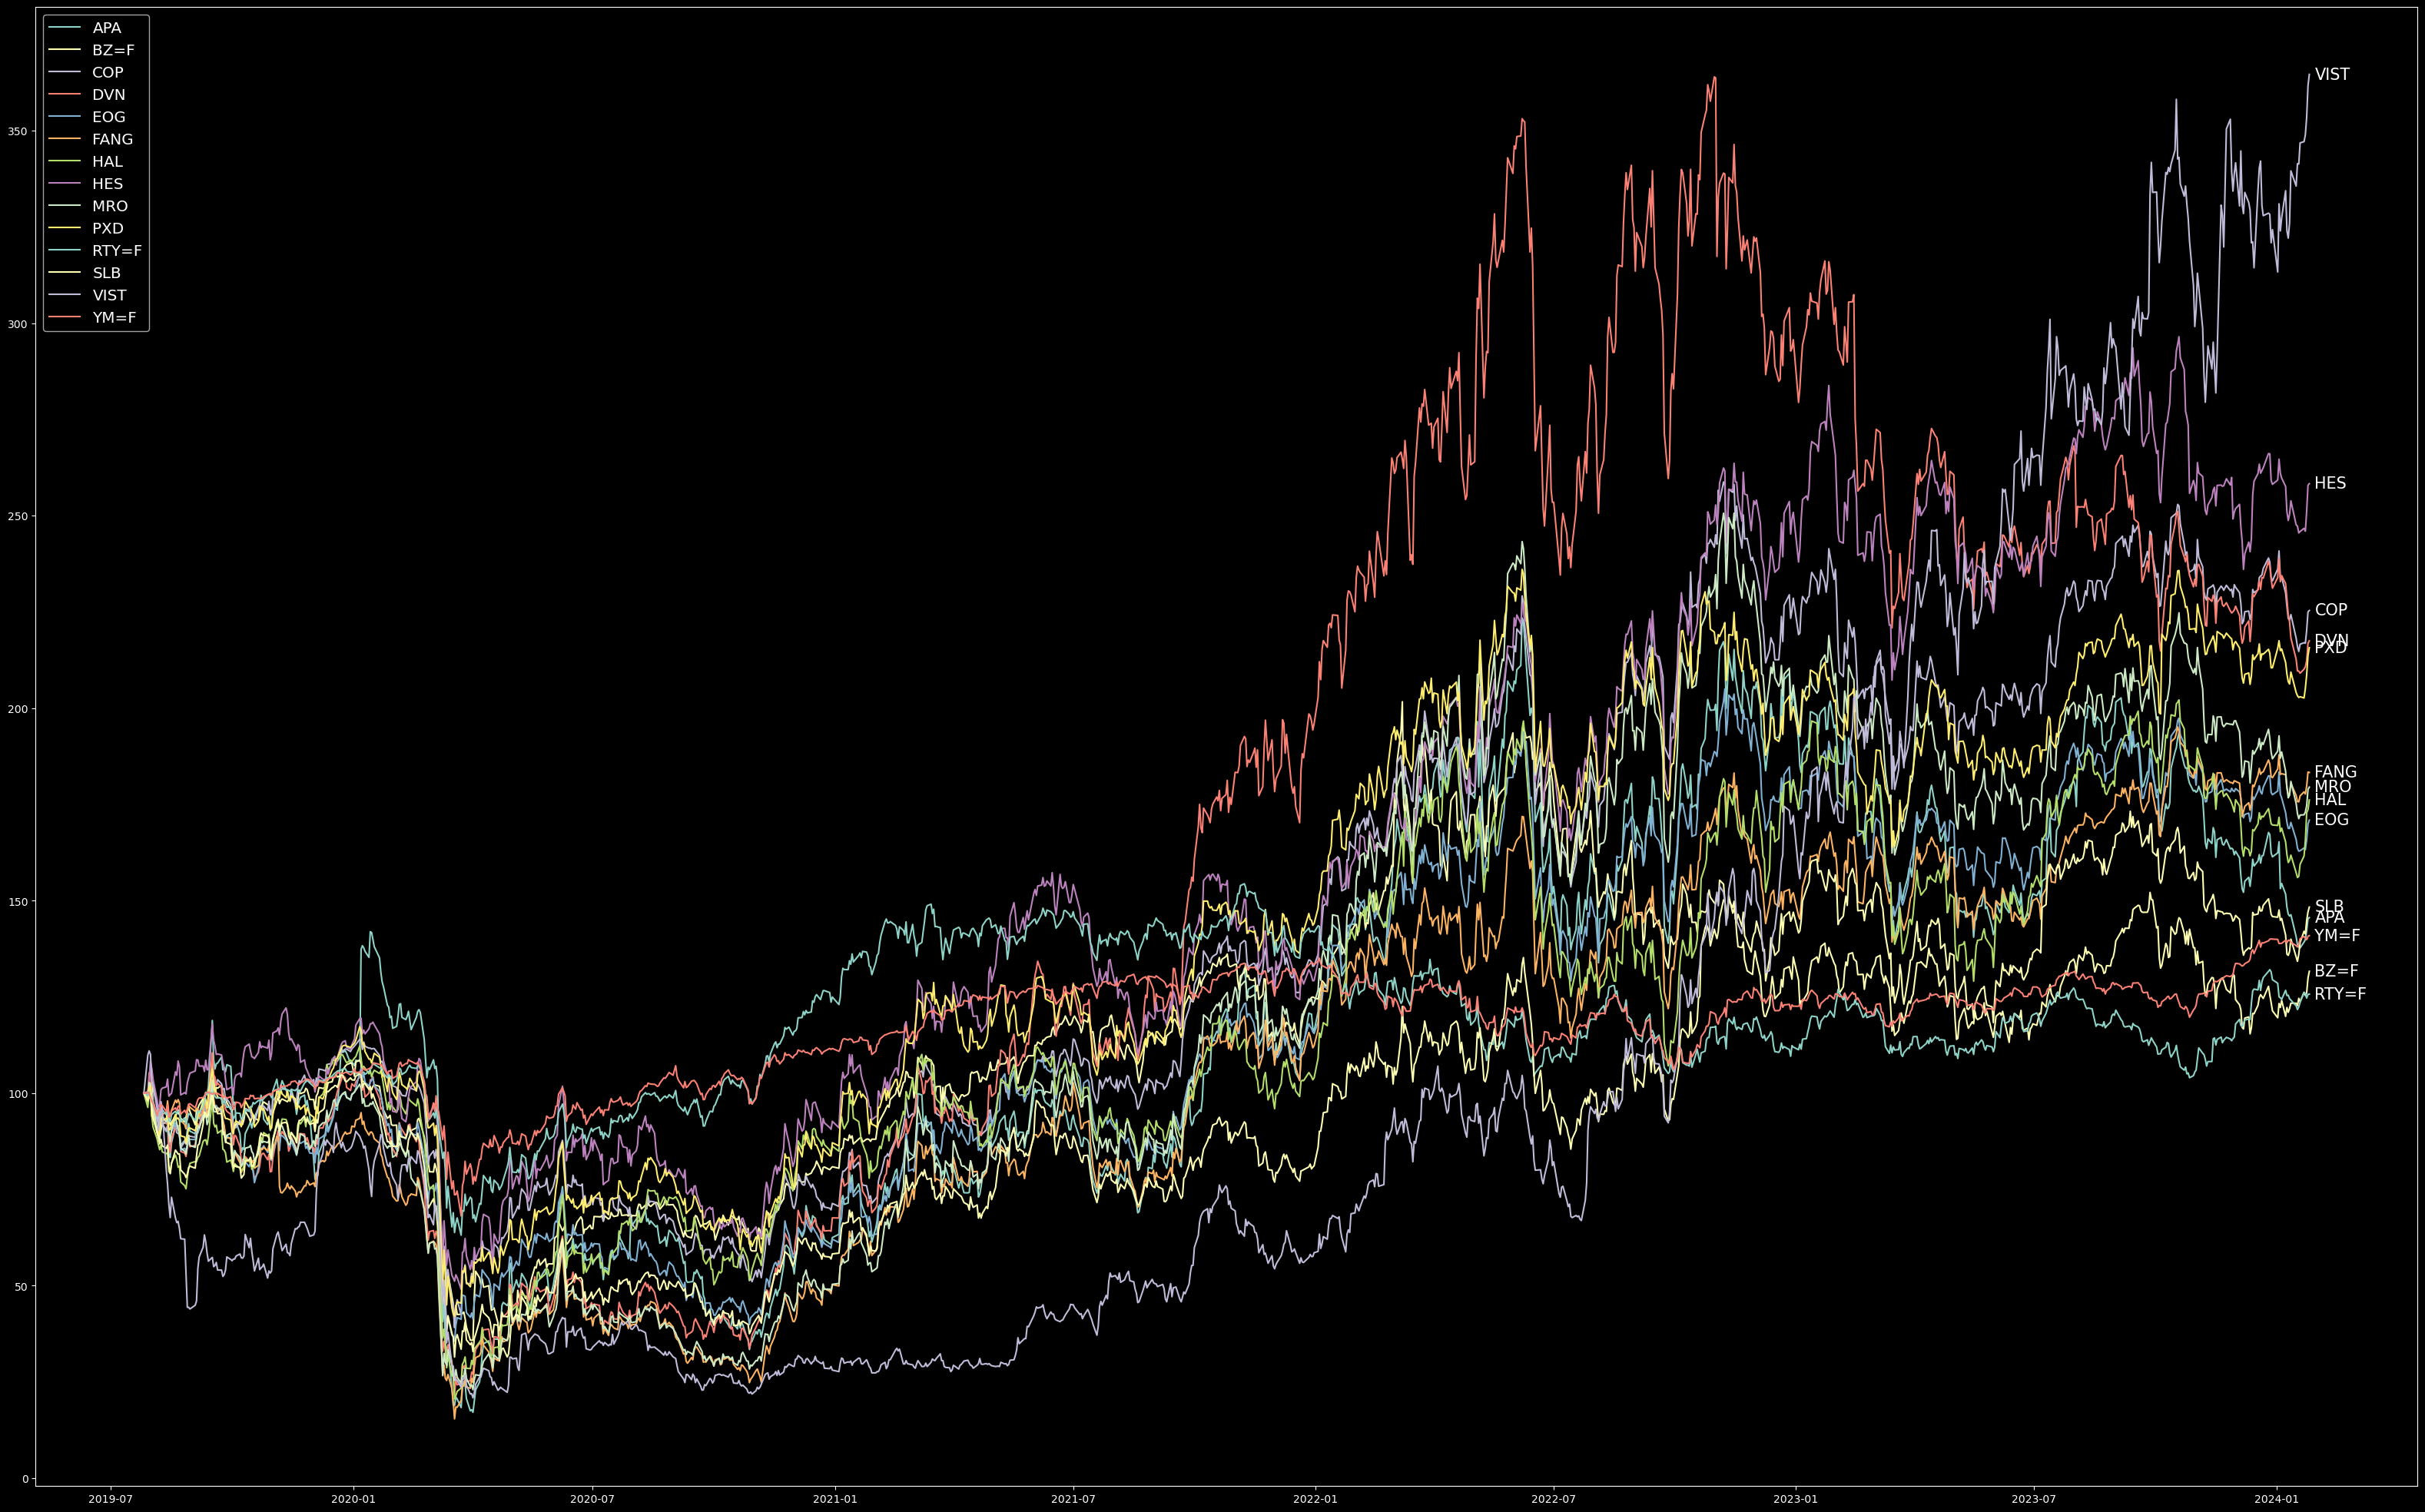

In [10]:
def graphic_correlations(data = best_correlations(), ticker = ticker, today = today):
    tickers = data.index.to_list()
    tickers.append(ticker)
    values = yf.download(tickers = tickers, start = '2010-1-1', end = f'{today.year}-{today.month}-{today.day}', auto_adjust = True)['Close']
    values.dropna(inplace = True)
    values = values.divide(values.iloc[0]) * 100

    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize = (40, 25))
    for ticker in values:
        plt.plot(values.index, values[ticker], label = f'{ticker}')
        plt.annotate(ticker, xy=(values.index[-1], values[ticker].iloc[-1]), xytext=(5,0), textcoords='offset points', ha='left', va='center', color='white', size = 15)
    plt.legend(fontsize = 'x-large')
    return values

graphic_correlations()